## I-94 Traffic Data Analysis

### Objective
To determine key indicators of heavy traffic on westbound [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). This highway runs between Minneapolis and Saint Paul, Minnesota. Indicators could include times, weather, and other factors.

### Data Source
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)


### Data Details
- `holiday`: Categorical US National holidays plus regional holiday, Minnesota State Fair
- `temp`: Numeric Average temp in kelvin
- `rain_1h`: Numeric Amount in mm of rain that occurred in the hour
- `snow_1h`: Numeric Amount in mm of snow that occurred in the hour
- `clouds_all`: Numeric Percentage of cloud cover
- `weather_main`: Categorical Short textual description of the current weather
- `weather_description`: Categorical Longer textual description of the current weather
- `date_time`: DateTime Hour of the data collected in local CST time
- `traffic_volume`: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

#### Import Libraries

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt

#### Read in and look at data

In [115]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [116]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [117]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


array([[<AxesSubplot:title={'center':'traffic_volume'}>]], dtype=object)

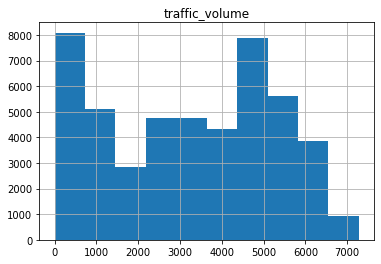

In [119]:
df.hist(column='traffic_volume')

In [120]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The distribution of `traffic_volume` appears bimodal. Traffic volume is either very low (likely during non-work hours, late nights) or hovers around 5,000 cars, per hour, heading westbound.

### Analyze Day vs. Night Traffic

We will split the dataset into two parts: Traffic between 7 am and 7pm, and traffic between 7pm and 7am.

In [121]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [123]:
df['date_time'].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

The times are now in a 24:00hr format. We will now divide this into two datasets, day and night, by writing two selections.

In [124]:
len(df)

48204

In [125]:
day_bool = (df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19)

In [126]:
df['day_time'] = np.where(day_bool == True, True, False) 

In [127]:
df.tail(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,day_time
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,True
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,True
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,True
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,True
48198,None,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947,True
48199,None,283.45,0.00,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,False
48200,None,282.76,0.00,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,False
48201,None,282.73,0.00,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,False
48202,None,282.09,0.00,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,False
48203,None,282.12,0.00,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954,False


Text(0, 0.5, 'Count')

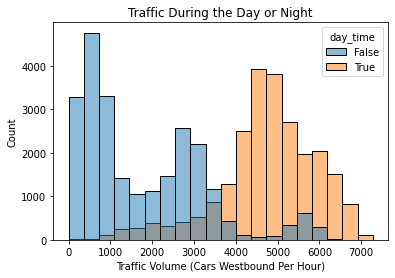

In [128]:
sns.histplot(x='traffic_volume', data=df, bins=20, hue='day_time')
plt.title('Traffic During the Day or Night')
plt.xlabel('Traffic Volume (Cars Westbound Per Hour)')
plt.ylabel('Count')

These two histograms are very different. A few takeaways:
- Traffic tends to be highest during the day, as expected. It is a left skewed distribution with a peak around 4,500 cars per hour.
- Traffic at night is bimodal.
- To find indicators of heavy traffic, we should restrict our analysis to the daytime data.

### Analysis of Daytime Data by Month, Day of Week, Time of Day

In [129]:
df_day = df.loc[df['day_time'] == True]

In [130]:
len(df_day)

23877

In [134]:
df_day['month'] = df_day.loc[:, 'date_time'].dt.month

C:\Users\nsmcc\AppData\Local\Temp/ipykernel_21652/1710282347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['month'] = df_day.loc[:, 'date_time'].dt.month


In [135]:
df_day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,day_time,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,True,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,True,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,True,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,True,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,True,10


In [137]:
by_month = df_day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

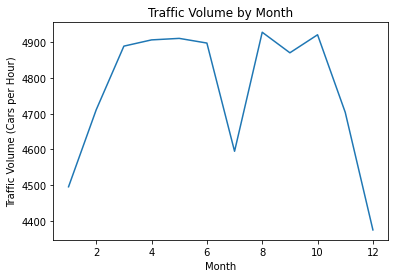

In [141]:
sns.lineplot(data=by_month, x='month', y='traffic_volume')
plt.title('Traffic Volume by Month')
plt.ylabel('Traffic Volume (Cars per Hour)')
plt.xlabel('Month')
plt.show()

The y-axis does not start at ZERO, and thus this plot is a little misleading. Still, there tends to be less traffic in January, July and December every year. Peak traffic occurs between March and May and then from August to October.

Now, we will segment our code based on the `DAY OF THE WEEK` and the `HOUR OF THE DAY` to look for more trends.

In [142]:
df_day['day_of_week'] = df_day.loc[:, 'date_time'].dt.dayofweek

C:\Users\nsmcc\AppData\Local\Temp/ipykernel_21652/4193950689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['day_of_week'] = df_day.loc[:, 'date_time'].dt.dayofweek


In [154]:
by_day = df_day.groupby('day_of_week').mean().reset_index()
by_day

,day_of_week,temp,rain_1h,snow_1h,clouds_all,traffic_volume,day_time,month
0,0,282.262755,2.923823,0.000017,57.508053,4893.551286,1.0,6.401243
1,1,282.301770,0.129172,0.000194,52.333234,5189.004782,1.0,6.458757
2,2,282.198316,0.068099,0.001091,53.662119,5284.454282,1.0,6.619158
3,3,282.279115,0.172436,0.000148,53.993191,5311.303730,1.0,6.501184
4,4,282.181216,0.092828,0.000225,51.412200,5291.600829,1.0,6.575067
5,5,282.300646,0.107596,0.000094,50.446376,3927.249558,1.0,6.498821
6,6,282.280340,0.133170,0.000000,52.288699,3436.541789,1.0,6.604179


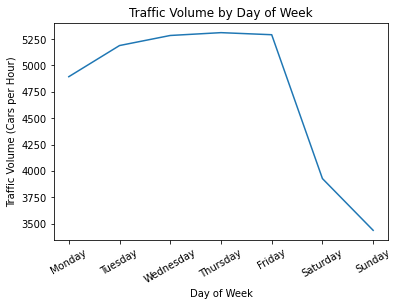

In [156]:
sns.lineplot(data=by_day, x='day_of_week', y='traffic_volume')
plt.title('Traffic Volume by Day of Week')
plt.ylabel('Traffic Volume (Cars per Hour)')
plt.xlabel('Day of Week')
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(ticks=by_day['day_of_week'], labels=labels, rotation=30)
plt.show()

As expected, there is a huge dip in traffic on the weekends. Wednesdays through Fridays tend to be the busiest days.

In [159]:
df_day['hour'] = df_day['date_time'].dt.hour
bussiness_days = df_day.copy()[df_day['day_of_week'] <= 4]
weekend = df_day.copy()[df_day['day_of_week'] >= 5]
by_hour_business = bussiness_days.groupby('hour').mean().reset_index()
by_hour_weekend = weekend.groupby('hour').mean().reset_index()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

0     6030.413559
1     5503.497970
2     4895.269257
3     4378.419118
4     4633.419470
5     4855.382143
6     4859.180473
7     5152.995778
8     5592.897768
9     6189.473647
10    5784.827133
11    4434.209431
Name: traffic_volume, dtype: float64
0     1589.365894
1     2338.578073
2     3111.623917
3     3686.632302
4     4044.154955
5     4372.482883
6     4362.296564
7     4358.543796
8     4342.456881
9     4339.693805
10    4151.919929
11    3811.792279
Name: traffic_volume, dtype: float64


C:\Users\nsmcc\AppData\Local\Temp/ipykernel_21652/3604798301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['hour'] = df_day['date_time'].dt.hour


In [160]:
by_hour_business.head()

,hour,temp,rain_1h,snow_1h,clouds_all,traffic_volume,day_time,month,day_of_week
0,7,278.662639,0.145105,0.000068,50.538983,6030.413559,1.0,6.363390,1.984407
1,8,278.938443,0.144614,0.000135,53.666441,5503.497970,1.0,6.567659,1.989175
2,9,279.628421,0.156829,0.000139,53.619709,4895.269257,1.0,6.484386,1.981263
3,10,280.664650,0.113984,0.000033,54.781417,4378.419118,1.0,6.481283,1.957888
4,11,281.850231,0.151976,0.000000,52.808876,4633.419470,1.0,6.448819,1.979957


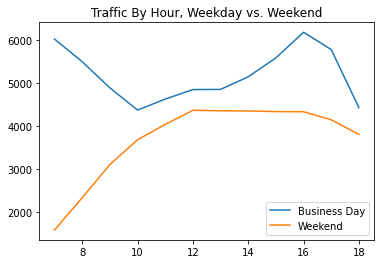

In [166]:
plt.plot(by_hour_business['hour'], by_hour_business['traffic_volume'], label='Business Day')
plt.plot(by_hour_weekend['hour'], by_hour_weekend['traffic_volume'], label='Weekend')
plt.title('Traffic By Hour, Weekday vs. Weekend')
plt.legend()
plt.show()

7AM and 4PM are the busiest times on weekdays. Weekends are busiest in the afternoons, until about 6pm. 

#### Summary of Time Analyses

Tuesdays - Fridays are the businest days for traffic. Days (between 7AM up to 7PM) are busier times to travel on I-94 West. Even certain months are busier than others!

#### Other Indicators

In [171]:
df.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']]

temp          0.130299
rain_1h       0.004714
snow_1h       0.000733
clouds_all    0.067054
Name: traffic_volume, dtype: float64

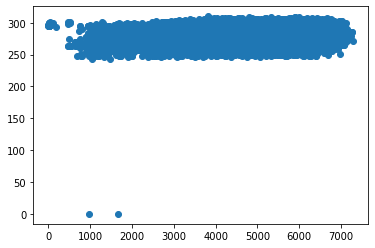

In [173]:
plt.scatter(df_day['traffic_volume'], df_day['temp'])
plt.show()

The temperature does not seem like a reliable indicator for heavy traffic. The other numerical weather columns -- like rain and snow -- are not correlated with traffic at all.

Now, let's look at the categorical weather columns: `weather_main` and `weather_description`.

In [178]:
by_weather_main = df_day.groupby('weather_main').mean().reset_index()
by_weather_description = df_day.groupby('weather_description').mean().reset_index()

In [179]:
by_weather_main.head()

,weather_main,temp,rain_1h,snow_1h,clouds_all,traffic_volume,day_time,month,day_of_week,hour
0,Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,1.0,6.490599,3.138928,12.404248
1,Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,1.0,6.393243,3.005631,12.911974
2,Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,1.0,7.105323,2.934315,12.308041
3,Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,1.0,6.646409,2.798343,10.325967
4,Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,1.0,5.832134,2.754197,12.467626


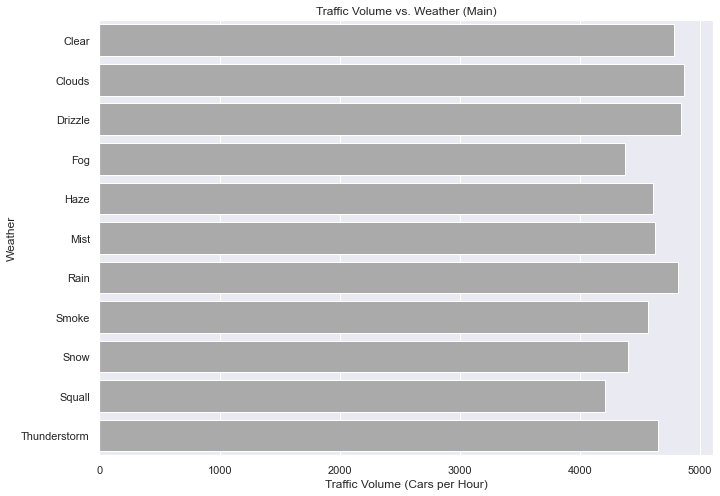

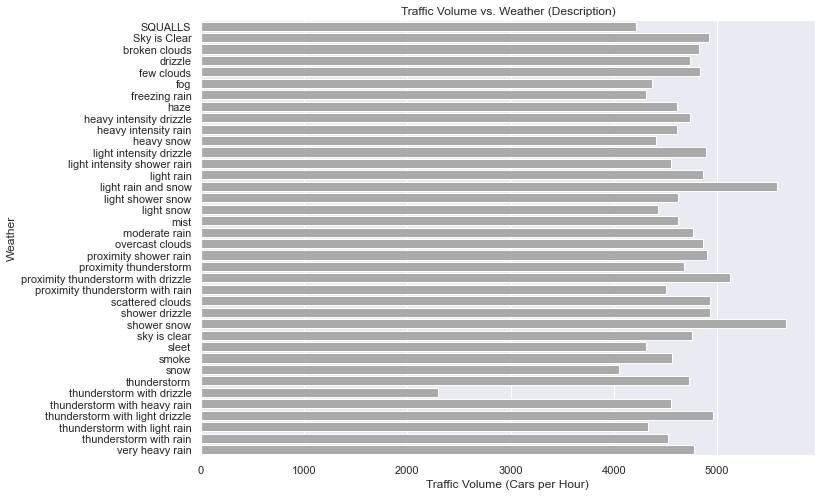

In [197]:
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(x="traffic_volume", y="weather_main", data=by_weather_main, color='#aaa', ci = None)
plt.title('Traffic Volume vs. Weather (Main)')
plt.xlabel('Traffic Volume (Cars per Hour)')
plt.ylabel('Weather')
plt.show()

sns.barplot(x="traffic_volume", y="weather_description", data=by_weather_description, color='#aaa', ci = None)
plt.title('Traffic Volume vs. Weather (Description)')
plt.xlabel('Traffic Volume (Cars per Hour)')
plt.ylabel('Weather')
plt.show()

The only type of weather that causes an appreciable decrease in traffic is `thunderstorm with drizzle`.

Both `shower snow` and `light rain and snow` are associated with MORE traffic volume. 

### Conclusion

Time, day of the week and even the month affect traffic volume of cars along I-94 West. Thunder and snowstorms tend to cause a higher than average traffic volume.